## Transformações de Intensidade


#### 1) Implemente as seguintes transformações de intensidade:
- Alargamento de contraste
- Negativo
- Logarítmico
- Potência

In [2]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import random
import math
import numpy as np

image = imread('dog.jpeg')
img = rgb2gray(image)

In [3]:
def alargamento(img, k, e):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] == 0):
                continue
            img[i][j] = 1/(1 + (k/img[i][j])**e)
    return img
    
def negativo(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = len(img) - 1 - img[i][j]

    plt.figure()
    plt.title('Negativo')
    plt.imshow(img,cmap = 'gray')
    plt.savefig('negativa.png')
    
def logaritmico(img, c):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = c*math.log10(1+img[i][j])
    return img
    
def potencia(img, c, y):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = c*img[i][j]**y

    return img

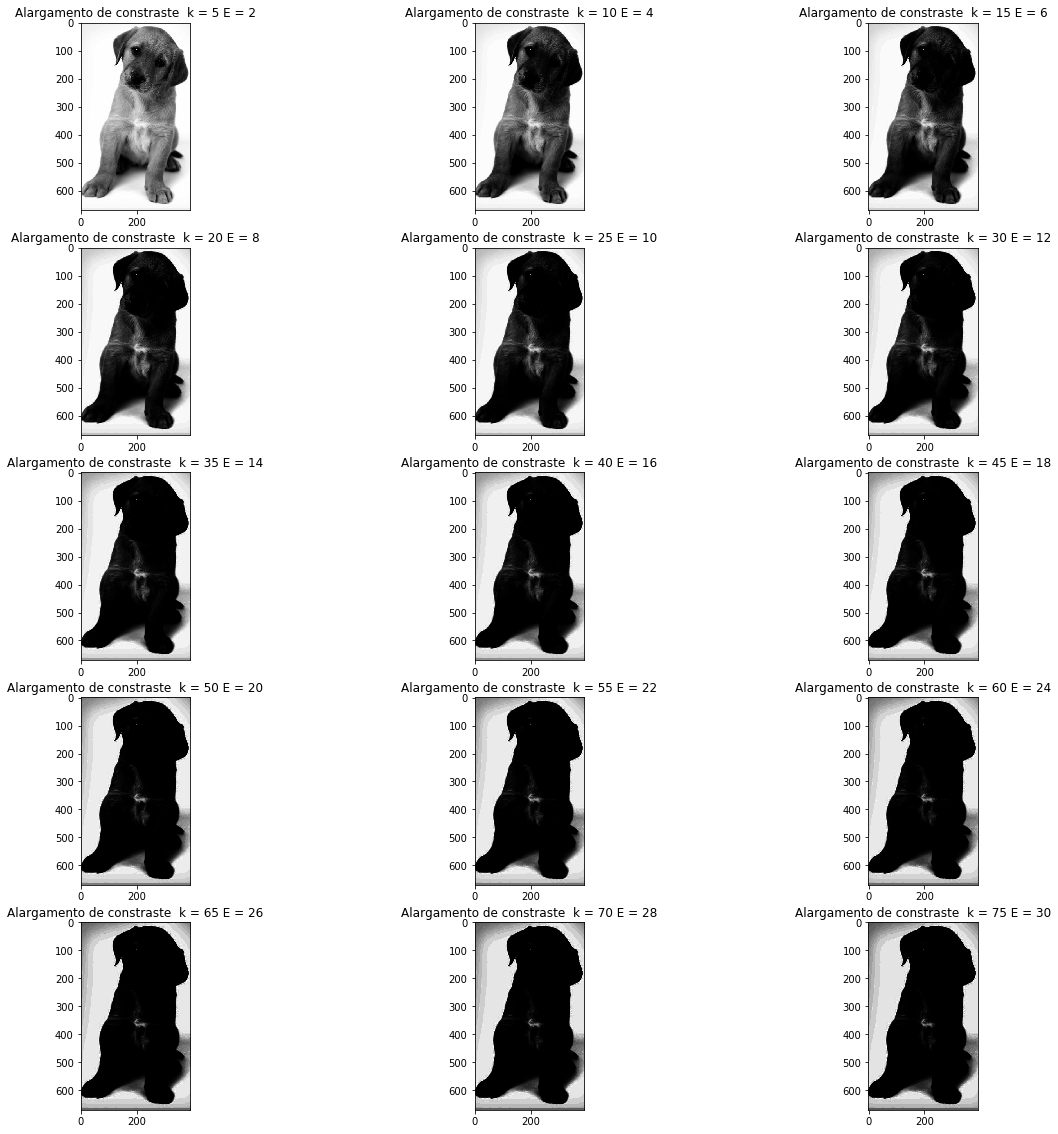

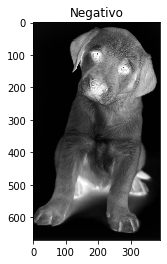

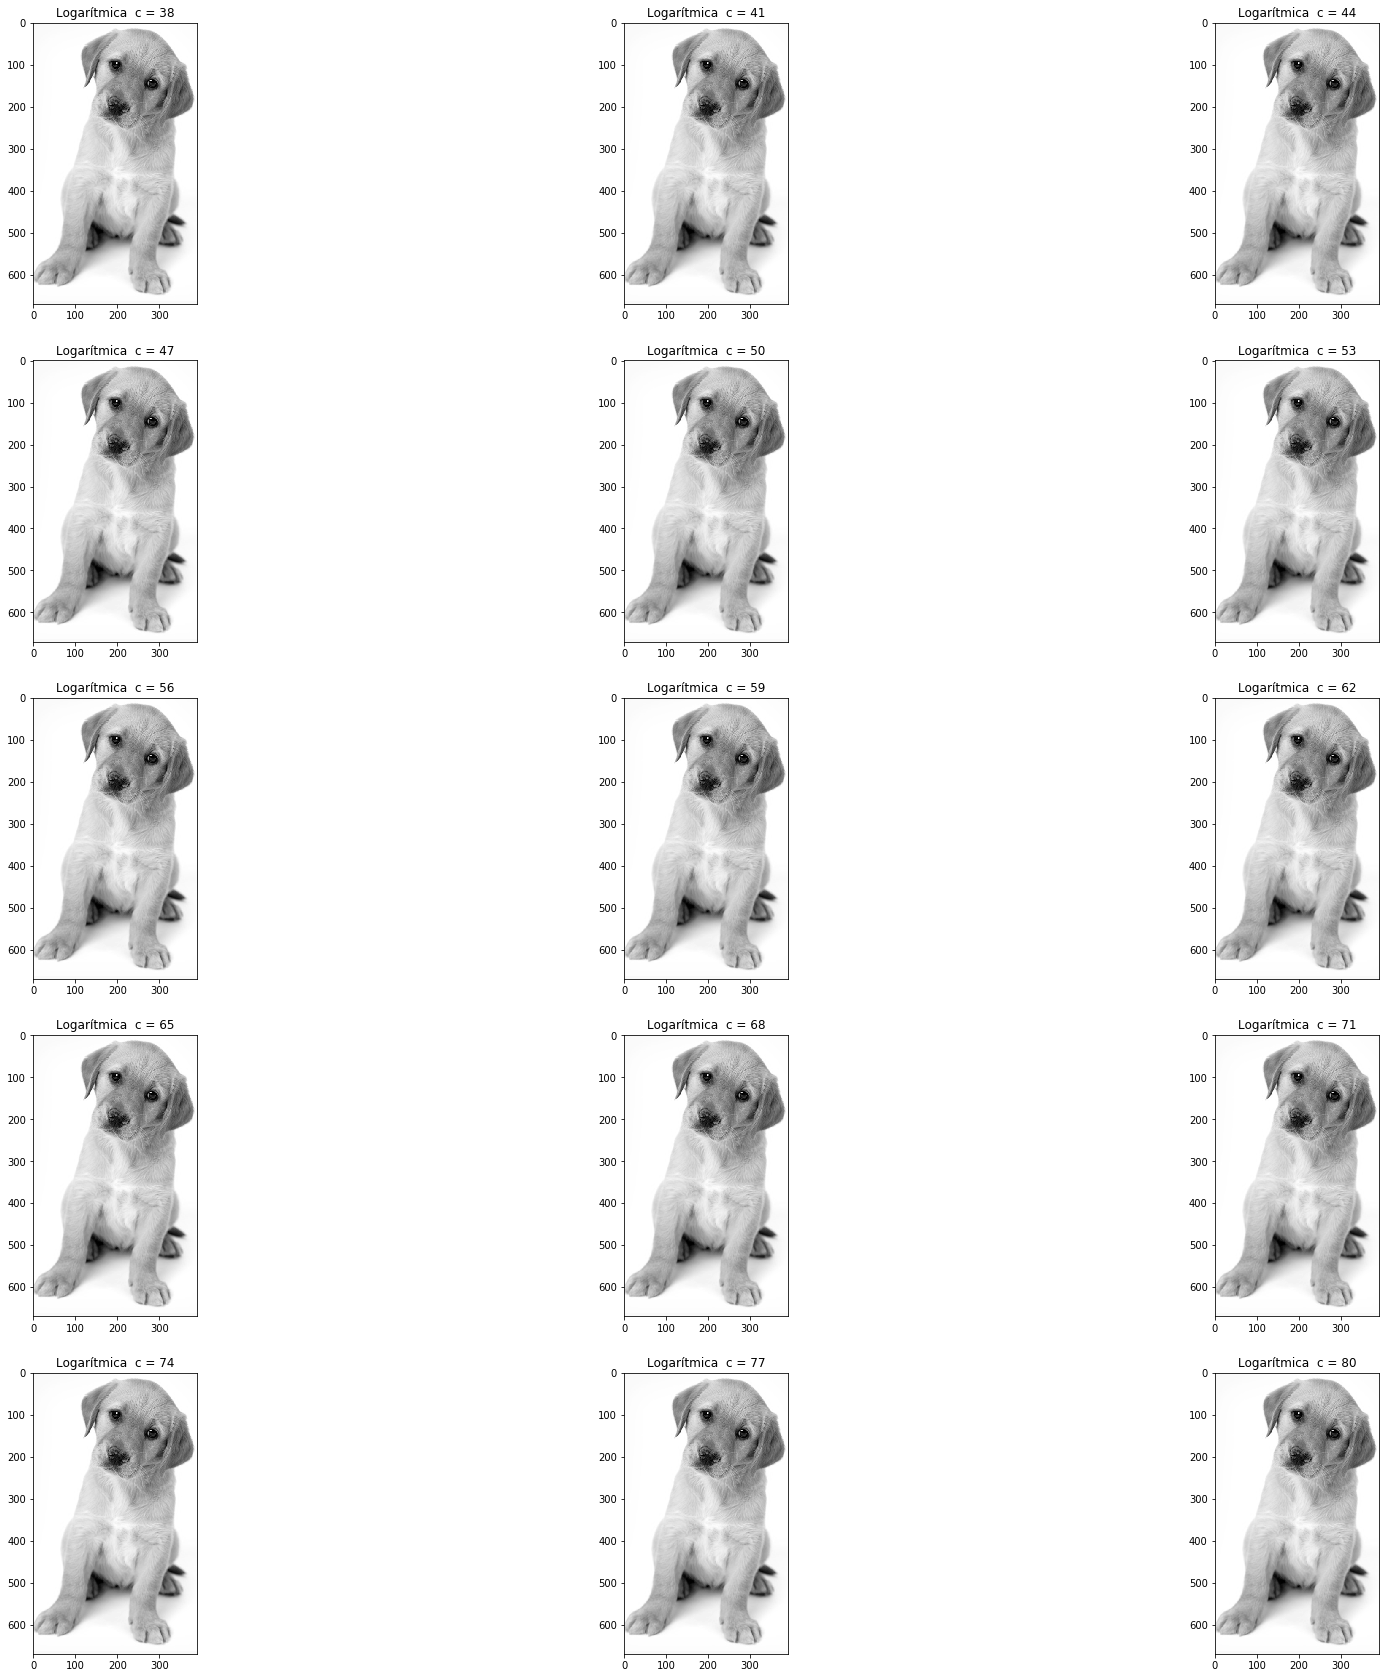

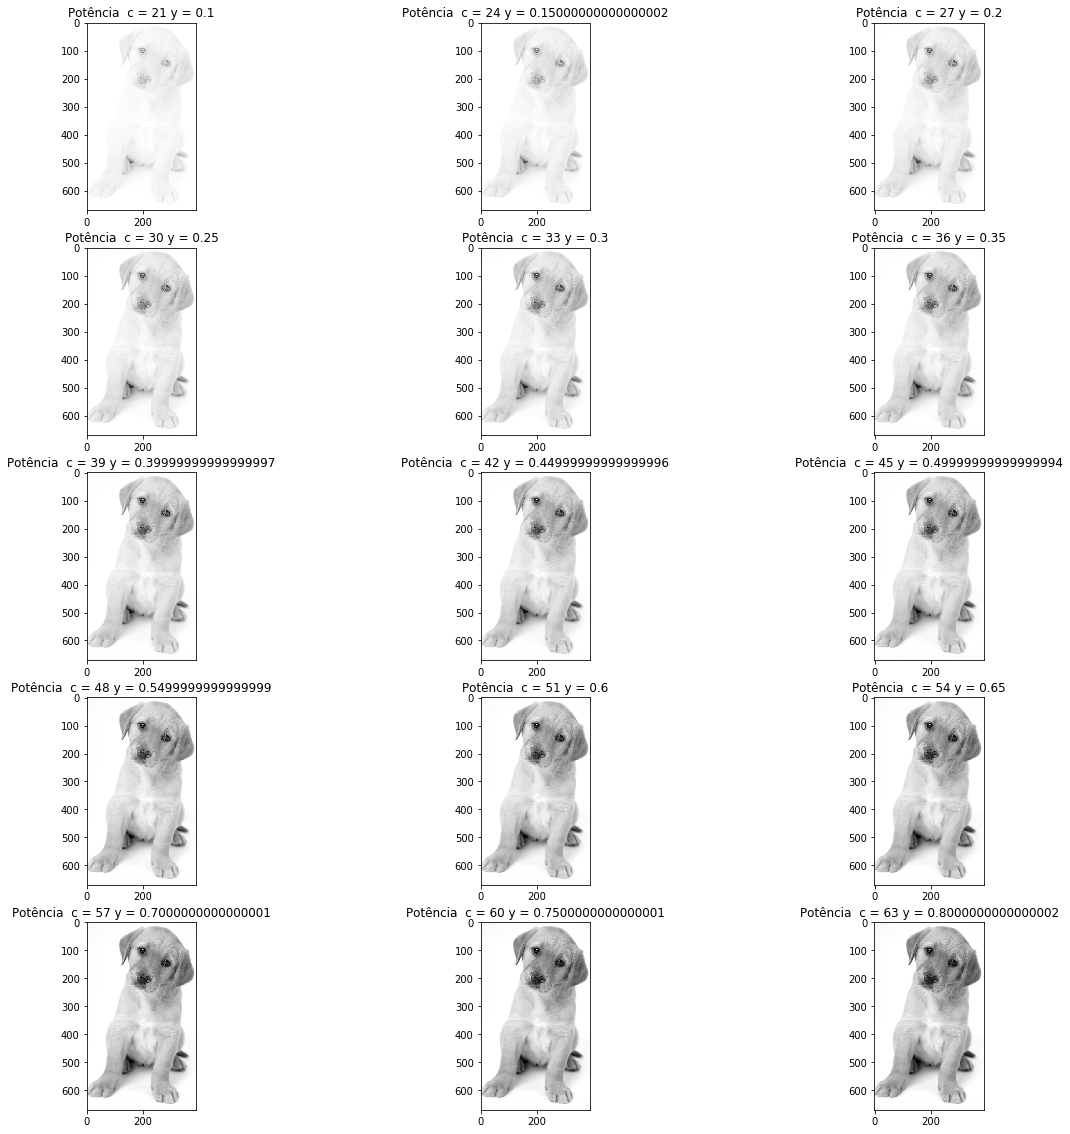

In [4]:
#Plotando alargamento
fig,alarg = plt.subplots(5,3,figsize=(20,20))
l = c = 0
k = 5#random.randint(1, 50)
e = 2#random.randint(1, 50)
for i in range(15):
    new = img.copy()
    alarg[l, c].imshow(alargamento(new, k, e),cmap = "gray")
    alarg[l, c].set_title('Alargamento de constraste  k = ' + str(k) + ' E = ' + str(e))
    c += 1
    if(c == 3):
        c = 0
        l += 1
    k += 5
    e += 2
fig.savefig("alargamento.png")
    
#Plotando o negativo
new = img.copy()
negativo(new)

#Plotando o logarítmico
fig,log = plt.subplots(5,3,figsize=(30,30))
l = c = 0
const = random.randint(1, 50)
for i in range(15):
    new = img.copy()
    log[l, c].imshow(logaritmico(new, const),cmap = "gray")
    log[l, c].set_title('Logarítmica  c = ' + str(const))
    const+=3
    c += 1
    if(c == 3):
        c = 0
        l += 1
        
#Plotando a potência
fig,pot = plt.subplots(5,3,figsize=(20,20))
l = c = 0
y = 0.1
const = random.randint(1, 50)
for i in range(15):
    new = img.copy()
    pot[l, c].imshow(potencia(new, const, y),cmap = "gray")
    pot[l, c].set_title('Potência  c = ' + str(const) + ' y = ' + str(y))
    c += 1
    if(c == 3):
        c = 0
        l += 1
    const+=3
    y+=0.05


##### 2) Implemente um algoritmo para quantizar imagens de N-bits. O algoritmo deve mostrar cada plano de bits.

 8


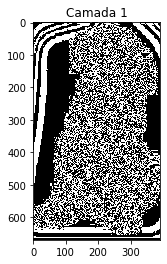

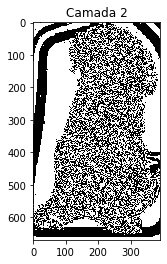

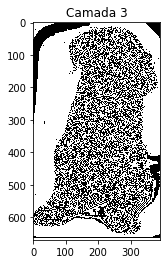

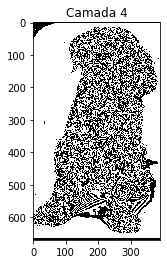

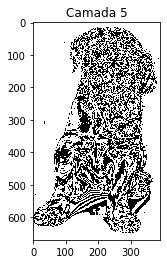

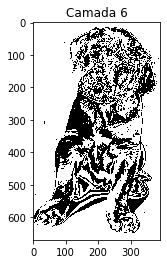

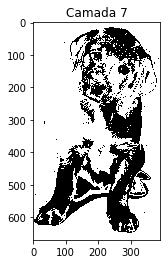

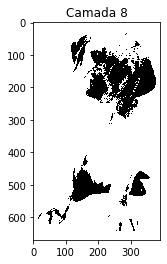

In [5]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import random
import math
import numpy as np

def decimalToBinary(n):  
    return bin(n).replace("0b", "")

def preencherComZeros(binary, qtdBits):
    bits = []
    sobra = 0
    if(len(binary) < qtdBits):
        sobra = qtdBits - len(binary)
    c = 0
    for i in range(qtdBits):
        if(i <= sobra-1):
            bits.append(0)
        else:
            bits.append(int(binary[c]))
            c += 1
    return bits

def binaryToDecimal(n): 
    num = n; 
    dec_value = 0; 
      
    # Initializing base  
    # value to 1, i.e 2 ^ 0 
    base = 1; 
      
    temp = num; 
    while(temp): 
        last_digit = temp % 10; 
        temp = int(temp / 10); 
          
        dec_value += last_digit * base; 
        base = base * 2; 
    return dec_value;

def planoDeBits(img, qtdBits):
    
    camadas = []
    for i in range(qtdBits):
        camadas.append(img.copy())
        
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            binary = decimalToBinary(int(img[i][j]*256))
            bits = preencherComZeros(binary, qtdBits)
            for k in range(qtdBits):
                camadas[k][i][j] = bits[qtdBits-1-k]
                
    for i in range(qtdBits):
        plt.figure()
        plt.title('Camada ' + str(i+1))
        plt.imshow(camadas[i],cmap = 'gray')
        

image = imread('dog.jpeg')
img = rgb2gray(image)
qtdBits = int(input())
planoDeBits(img, qtdBits)